<a href="https://colab.research.google.com/github/h-aldarmaki/NLPCourse/blob/main/Language_Models_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *n*-gram Language Models

In this exercise, you will learn how to implement *n*-gram language models, use them to calculate sentence probabilities, and generate text from the LM distribution. The implementation is meant to be straightforward and intuitive, not necessarily efficient. 

##**What you will do:**


1.   Follow the steps in this notebook and read all lines of code and comments to understand what's happening. 
2.   Answer questions and complete the code where required (questions are marked as "**Exercise**")
3.   Submit your final implementation (as **Pdf** + sharable link) and a sample of generated text from bigram and trigram models. 
4.   **[Optional - Bonus 2 points]** Train an LM on a different dataset of your choice. Use it to generate new sentences. Describe the additional steps you used to normalize the dataset. 


##**What you will need:**

We will use the following python packages: 


*   nltk
*   re
*   numpy
*   pandas

Remind yourself of regular expressions and numpy functions from previous exercises.


### **Data Structures:**
To conveniently store n-grams statistics, we will use the  ```freqDist``` class from NLTK 
https://www.kite.com/python/docs/nltk.FreqDist

We will also use the ```bigrams``` and ```ngram``` functions from NLTK:
https://www.kite.com/python/answers/how-to-split-a-string-into-n-grams-in-python 

And we will use ```Pandas.DataFrame``` for sampling from n-gram distributions

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html



###**The Dataset**

The Berkeley Restaurant Project (BeRP) dataset contains about 7 hours of recorded utterances that were collected for the purpose of designing a speech recognition system for restaurant recommendations in the city of Berkeley, California. We will use the text transcripts for training our model.  


#Steps:

Download the dataset and inspect the file berp-trans/transcript.txt. Note that the transcripts are already tokenized but there are some additional notations, like the audio file name and pause fillers such as [uh] [um] etc. Process the data by removing the filename and any such codes, i.e. everything between < > or [ ]. Later, we will add \<s\> and \</s\> tags to identify beginning and end of sentences. 

In [ ]:
# download the dataset
! git clone https://github.com/wooters/berp-trans.git


Cloning into 'berp-trans'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22
Unpacking objects: 100% (22/22), done.


In [ ]:
# Inspecct the first 10 lines
! head berp-trans/transcript.txt


#**Part 1**


---



#Process Dataset

First, we will read the dataset and apply regular expressions to remove the unwanted tags. 

**Exercise:** Complete the code below by adding the missing statements in the while loop. Check the output to make sure the processing is done correctly.

In [ ]:
import re

#Let's first read the file
filename ='berp-trans/transcript.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

#split sentences
text = text.split('\n')

print(text[:10])

i=0
while i < len(text):
  #TODO Apply a regular expression to remove the first word from each line (e.g. 33_1_0001)


  #TODO Apply a regular expression to remove all HTML tags and pause fillers -- anything between square [ ]  and angled < > brackets 


  
  i = i + 1

print(text[:10])






#  Dataset Division

Next, we will split the dataset into train and test parts. Most of the data will be used for training, and a small fraction is held out for testing. 

In [ ]:
#Let's now divide the dataset into Train and Test sets

print(len(text))

#I'll keep the first 8000 sentences for training, and the rest for testing ...

trainset = text[0:8000]
testset = text[8000:]


#Unigram Distribution

Next, we will caclulate the distribution of the unigrams (i.e. the words) in the training set. We will add \<s\> and \</s\> tags to identify beginning and end of sentences. FreqDist() will be used for convenience. Alternatively, we could use a python dictionary to store the unique tokens and their counts. 

In [ ]:
import nltk

#create FreqDist object
unigram_dist = nltk.FreqDist()
for sen in trainset:
  #add sentence boundary tags
  sen = "<s> "+ sen +" </s>"
  #Update the frequency distribution (sen.split() will split the sentnece into words)
  unigram_dist.update(sen.split())

#print the 10 most common unigrams:
print(unigram_dist.most_common(10))

#Total number of tokens, including the added <s> and </s> tags
print(unigram_dist.N())

#count for the word 'like'
print(unigram_dist.get('like'))

#relative frequency (probability) of the unigram 'like'
print(unigram_dist.freq('like'))


#Bigram Distribution

Next, we will caclulate the distribution of the bigrams (i.e. two consecutive words) in the training set. Again, we will add \<s\> and \</s\> tags to identify beginning and end of sentences. We will use ```nltk.bigrams ``` to get a list of all bigrams in each sentence. FreqDist() will be used to store the counts. 

In [ ]:
#nltk.bigrams returns a list of bigrams. 
#We could alternatively use nltk.ngrams, and specify the order n in the parameters

import nltk
sentence = trainset[0]
print(sentence.split())
for bigram in nltk.bigrams(sentence.split()):
 print(bigram)

for trigram in nltk.ngrams(sentence.split(), 3):
  print(trigram)

In [ ]:
#get all bigrams from the corpus, then add them to frequency distribution
bigram_dist = nltk.FreqDist()
for sen in trainset:
  sen = "<s> "+sen+" </s>"
  bigrams = nltk.bigrams(sen.split())
  bigram_dist.update(bigrams)

#print the most common bigrams
print(bigram_dist.most_common(10))



#Calculating Sentence Probability

**Exercise:** Given the n-gram distributions above, write code for calculating the following:

1.   P('i')
2.   P('want' | 'i')
3.   P('\<s\> i want to go to an italian restaurant \</s\>')

**Exercise:** Complete the implementation of the function sentence_prob(sen), which should take any string ```s``` and return its probability. Assume the string does not contain the \<s\> and \</s\> tags, but you need to include them in the calculation. 




In [ ]:
# 1. calculate and print P('i')


# 2.  calculate and print P('want' | 'i')


# 3. calculate and print P('<s> i want to go to an italian restaurant </s>')


# 4. Complete the implementation of the following function. 
# Then test it using the string "i want to go to an italian resurant"
# You should get the same value as in (3.)
def sentence_prob(s):
  #your code here

p=sentence_prob("i want to go to an italian restaurant")
#formatted print:
print(f'p={p:.20f}')



Note that multiplying probabilities quickly leads to very small values. This can become problematic in practice; for example, if we try to calculate the probability of the whole dataset, we can run into an underflow error. It is better to use log probabilities instead and sum their values. 

**Exercise:** Complete the implementation of the function log_prob(sen), which should take any string ```s``` and return its log probability. Assume the string does not contain the \<s\> and \</s\> tags, but you need to include them in the calculation. 

In [ ]:
import numpy as np
def log_prob(s):
  #Add your code here
  

print(log_prob("i want to go to an italian restaurant"))
p=np.power(2, log_prob("i want to go to an italian restaurant"))
print(f'p={p:.20f}')





##What is encoded in n-grams?

Now that you know how to calculate probabilities, let's try to figure out what kind of knowledge is encoded in this simple model. The dataset is about restaurant recommendations in Berkeley, California. Which do you think is more popular, Chinese or russian food?

**Exercise:** Which of the following two sentences has higher probability? Use the functions you developed above to calculate and compare these probabilities. 

* "i want chinese food"
* "i want russian food"


**Exercise:** Which of the following two sentences has higher probability? Use the functions you developed above to calculate and compare these probabilities. 

* "i like to chinese food"
* "i like to eat chinese food"

Notice that, since we multiply values that are less than one (or sum up negative values in the case of log_prob), longer sentences tend to have lower probability. However, the above example shows how a grammatical error can lead to lower probability since p(chinese|to) is very low!

In [ ]:
#your code here






#Text Generation

We will now use the language models we developed to have some fun. There are many applications of language model, such as text completion or text generation. All we need is a way to sample from a distribution. We can use ```DataFrame``` from the pandas package to conveniently sample from our n-gram distributions. The following few cells shows you how to sample from the unigram distribution; read the comments and the code to understand the steps you need to sample from a distribution. 

In [ ]:
import pandas as pd

#first, convert the unigram_dist object to a pd.DataFrame object:
temp = pd.DataFrame(pd.Series(unigram_dist))

#rename the columns 
temp.columns = ['counts']

#Sort the values by count
temp = temp.sort_values('counts', ascending=False)

#Print the dataframe and note the most common unigrams
print(temp)

In [ ]:
# Sample 10 words from the unigram distribution. replace=True allows sampling the same words multiple timees ... 
# Run this multiple times and observe the output 
print(temp.sample(n=10, replace=True, weights='counts'))


In [ ]:

# we can extract only the words:
generated = temp.sample(n=10, replace=True, weights='counts')
generated = generated.index.values
for word in generated:
    if word not in ['<s>', '</s>']:
        print(word, end =" ")

In [ ]:
#For bigrams, we need to first extract the conditional distribution. 
# For example, if we want to sample words following the word "like", we need to
  #find the counts of bigrams that start with "like" 
words=[]
counts=[]
for k,v in bigram_dist.items():
  if k[0] == 'like': #check if bigram starts with 'like'
    words.append(k[1])  #append the word following 'like' to the list of words
    counts.append(v)

like_dist = pd.DataFrame({'counts': counts}, index=words)
like_dist = like_dist.sort_values('counts', ascending=False)
print(like_dist)

#Now we can sample a word from this distribution
print(like_dist.sample(n=1, weights='counts'))

**Exercise:**



1. Given the above hints, complete the implementation of the function: ```generate_from_bigrams```. The function takes one word, and it should return a word sampled from the bigram distribution. 

The rest of the code generates random sentences using this  function. Starting with the unigram \<s\>, it keeps generating new words until an \</s\> tag is generated, which marks the end of sentence. 

In [ ]:

def generate_from_bigrams(word0):
  #your code here


i=0
print("Sentences generated using bigram model:\n")
while i<10:
  word0="<s>"
  sen = ""
  while True:
    word1 = generate_from_bigrams(word0)
    if word1 == "</s>":
      break
    sen =sen+" " +word1
    word0 = word1

  print(sen)
  i=i+1



#**Part 2**


---



#Zero counts and smoothing

**Exercise:** What is the probability of the following two sentences:

* "i want to eat egyptian food"

* "i want to go to an egyptian restaurant"

The bigram "egyptian restaurant" does not exist in out dataset, so we get an error. We could easily fix that error by first checking if the bigram exist

```
if bigram_dist.get( (w0, s[i]) ) == None :
   p = p * 0
else 
   ...
```

However, this means that the whole sentence will have probability 0! this is not cool as we would like to calculate probabilities for all possible sentences, and it's not reasonable to assume that all valid bigrams would occur in the training dataset ... 

The solution is smoothing or backoff. Let's start by implementing add-1 smoothing. 

**Exercise:** Modify your log_prob function to implement add-1 smoothing for bigrams. Remember the formulas for calculating bigram probabilities:

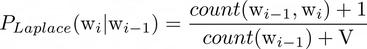

Where V is the vocabulary size. You can find the unique vocabulary items using ```unigram_dist.keys()```. Therefore, the size of the vocabulary can be calculated using the following line:

```V = len(unigram_dist.keys() )```

In [ ]:
#Re-implement log_prob(s) by incorporating add-1 smoothing
def log_prob(s):
  V = len(unigram_dist.keys())
  #Add your code here
  

#then test the implementation:
print(bigram_dist.get(('egyptian', 'food')))
print(log_prob("i want to eat egyptian food"))
print(log_prob("i want to go to an egyptian restaurant"))

#Unknown Words

In the previous section, we handled unseen bigrams, but all the words in the sentence were already seen in the training set. What if we encounter a new word?

For example, what is the probability of this sentence: 

* "i want to eat emirati food"

The word "emirati" does not exist in our dataset, so this will cause an error. If we assign probability 0 to all new words, the whole sentence will have 0 probability, which is not what we want! 

One way to handle this is to assign some probability mass to unseen words. The most common way of doing that is to treat some words in the training set as unknown words. For example, we can take all words that occur only once in ```trainset``` and replace them with ```<unk>``` tag. This way, when we calculate the counts from the trainset, we will have a count for ```<unk>``` which we can then use to calculate the unigram and bigram probabilities for unseen words ... 


We can get the words that occur only once in the train set using the following function

```unigram_dist.hapaxes()```

In [ ]:
#print(log_prob("i want to emirati food"))

#hapaxes: words that occur only once
hapaxes= unigram_dist.hapaxes()

# Let's recalculate unigram_dist with <UNK> tags instead of hapaxes ... 
# At the same time, we will create a new dataset called "new_train" 
unigram_dist_unk = nltk.FreqDist()
bigram_dist_unk = nltk.FreqDist()

new_train = []
for sen in trainset:
  new_sen = "<s>"
  words = sen.split()
  for word in words:
    if word in hapaxes:
      new_sen = new_sen + " <unk>"
    else:
      new_sen = new_sen + " " + word
  new_sen = new_sen+" </s>"
  unigram_dist_unk.update(new_sen.split())
  bigrams = nltk.bigrams(new_sen.split())
  bigram_dist_unk.update(bigrams)
  new_train.append(new_sen)
      


print(unigram_dist_unk.most_common(10))
#Total count
print(unigram_dist_unk.N())
#count for the word 'like'
print(unigram_dist_unk.get('like'))
#unigram frequency of 'like'
print(unigram_dist_unk.freq('like'))
print(unigram_dist_unk.freq('<unk>'))



**Exercise**: Modify your log_prob function to include <unk> tags for unseen words. You can get a list of words already seen in the training set using the following

```vocab = unigram_dist.keys()```

Then, for each word in the sentence, you can check if it's in the voacbulary or not. If not, replace the word with \<unk\> to retrieve the correct count from ```unigram_dist_unk``` and ```bigram_dist_unk```. 


In [ ]:
vocab = unigram_dist_unk.keys()

#re-implement log_prob(s) by incorporating unknown words
def log_prob(s):
  #your code here
  


print(log_prob("i want to eat emirati food"))

#Perplexity 

Now that we can handle unseen words and bigrams, we can calculate the perplexity of the dataset. Remember that the formula for perplexity is given by:

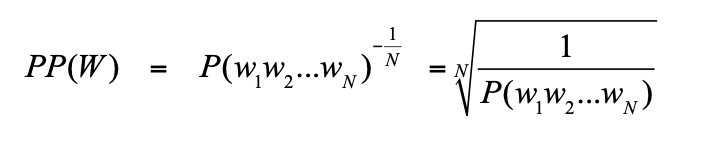

However, it is better to deal with log probabilities, so you can use your log_prob function in the calculation and simply add up the log probabilities of all sentences in the dataset. To get the actual perplexity, 

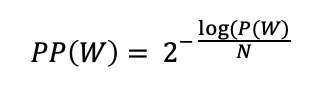


**Exercise**:

The following code shows how to calculate the perplexity for the training set. Use a similar code to calculate the perplexity of the test set. 

In [ ]:
#Calculate dataset perplexity
import numpy as np
sum = 0
N = 0
for sen in trainset:
  #calculate sum of log probabilities
  words = sen.split()
  if len(words) < 1:
    continue
  N = N + len(words)+2 # +2 for the <s> and </s> tags
  sum = sum + log_prob(sen)

print(sum/N)
pp = np.power(2, -(sum/N))
print(pp)



---




#Trigram language model

Now that you have experience with unigram and bigram models, you can handle longer n-grams. Implement a trigram language model for the dataset, and use it to compare probabilities of sentences, and to calculate the perplexity of the test set. If you cannot find counts for a specific trigram, backoff to the bigram probability (just call the approperiate function from above implementation). Use the new_train dataset which already has rare words replaced with \<unk\>

**Exercise**:

* Implement a trigram language model with backoff as described above. Use ```new_train``` dataset. 
* Implement a method ```log_prob_tri(s)``` for calculating a probability of a sentence using the trigram model. Use stupid backoff to handle cases where a trigram count is 0. 
* Report the perplexity of the test set using unigram, bigram, and trigram language models. Which model has the lowest perplexity? 

In [ ]:
#your code here:

#**Text Generation**

We will now use the trigram language model for text generation, as we did with bigrams. 

**Exercise:**

1. Complete the implementation of the function ```generate_from_trigrams```. This function is similar to ```generate_from_bigrams```, but it searches the trigram distribution instead. It takes two words as arguments, and it should return the third word. You should be careful in the implementation, as some combinations of word0 and word1 might not exist. In that case, you need to back off to the bigram distribution (generate using word1 alone). 


The rest of the code generates random sentences using this function. Starting with the unigram \<s\>, then it keeps generating new words until an \</s\> tag is generated, which marks the end of sentence. 

In [ ]:
def generate_from_trigrams(word0, word1):
  #your code here


i=0
print("\n\nSentences generated using trigram model:\n")
while i<10:
  word0="<s>"
  sen = ""
  #1. generate first word from bigram distribution:
  word1 = generate_from_bigrams(word0)
  sen = word1
  #generate remaining words
  while True:
    word2=generate_from_trigrams(word0, word1)
    if word2 == "</s>":
      break
    sen =sen+" " +word2
    word1 = word2
    word0 = word1

  print(sen)
  i=i+1